In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df=pd.read_csv("Social_Network_Ads.csv")
df.sample(3)

,Age,EstimatedSalary,Purchased
0,19,19000,0
23,45,22000,1
145,24,89000,0


In [3]:
df.shape

(400, 3)

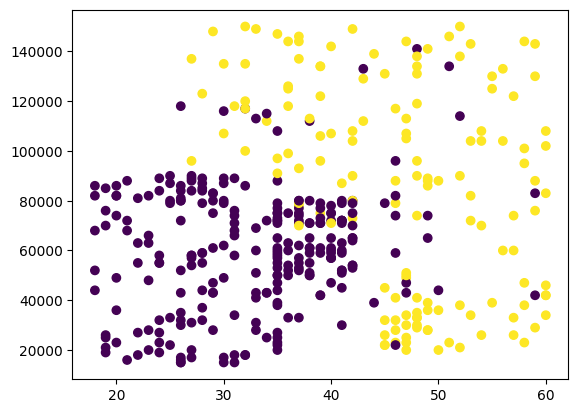

In [14]:
plt.scatter(df['Age'],df['EstimatedSalary'], c=df['Purchased'])

In [16]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [4]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [5]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler 
scaler=StandardScaler()
X_new=scaler.fit_transform(X)

In [6]:
from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=42)

In [7]:
import tensorflow 
from tensorflow import keras 
from keras.layers import Dense,Flatten 
from keras import Sequential 
model =Sequential()

In [8]:
model.add(Dense(10,activation="relu",input_dim=2))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation='sigmoid'))

C:\Users\raj\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 10)                  │              30 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             110 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 151 (604.00 B)

 Trainable params: 151 (604.00 B)

 Non-trainable params: 0 (0.00 B)

In [10]:
import time
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history=model.fit(X_train,y_train,epochs=10,batch_size=320)     # batch graindent 
print(time.time()-start)

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5969 - loss: 0.6770
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step - accuracy: 0.6156 - loss: 0.6682
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.6219 - loss: 0.6620
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 0.6375 - loss: 0.6569
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step - accuracy: 0.6406 - loss: 0.6524
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - accuracy: 0.6500 - loss: 0.6484
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step - accuracy: 0.6531 - loss: 0.6446
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step - accuracy: 0.6562 - loss: 0.6410
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.6656 - loss: 0.6377
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - accuracy: 0.6656 - loss: 0.6345
4.2675018310546875


In [11]:
model.add(Dense(10,activation="relu",input_dim=2))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation='sigmoid'))

In [12]:
import time
model.compile(loss='binary_crossentropy',metrics=['accuracy'])
start = time.time()
history=model.fit(X_train,y_train,epochs=10,batch_size=1,validation_data=(X_test,y_test))     # stucatstic graindent 
print(time.time()-start)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.5422 - loss: 0.6906 - val_accuracy: 0.6500 - val_loss: 0.6644
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6656 - loss: 0.6550 - val_accuracy: 0.7000 - val_loss: 0.6243
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7343 - loss: 0.6184 - val_accuracy: 0.8625 - val_loss: 0.5506
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8519 - loss: 0.5363 - val_accuracy: 0.9000 - val_loss: 0.4520
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8799 - loss: 0.4665 - val_accuracy: 0.9000 - val_loss: 0.3569
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8834 - loss: 0.3714 - val_accuracy: 0.9375 - val_loss: 0.2837
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8910 - loss: 0.3208 - val_accuracy: 0.9250 - val_loss: 0.2421
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8627 - loss: 0.3389 - val_accuracy: 0.

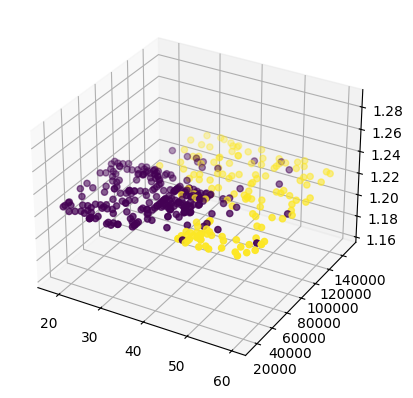

In [19]:
import numpy as np 
r=np.exp(df['Age']).sum(0)
ax= plt.subplot(projection='3d')
ax.scatter(df['Age'],df['EstimatedSalary'],r, c=df['Purchased'])

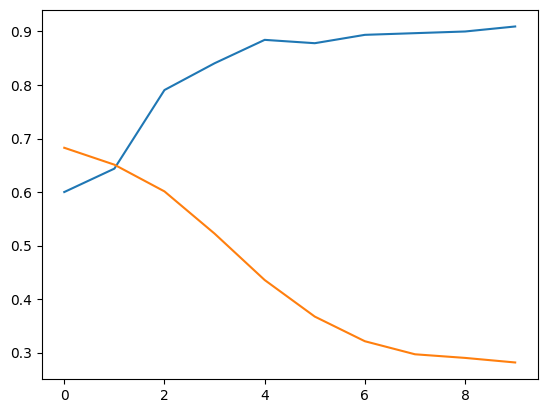

In [20]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])

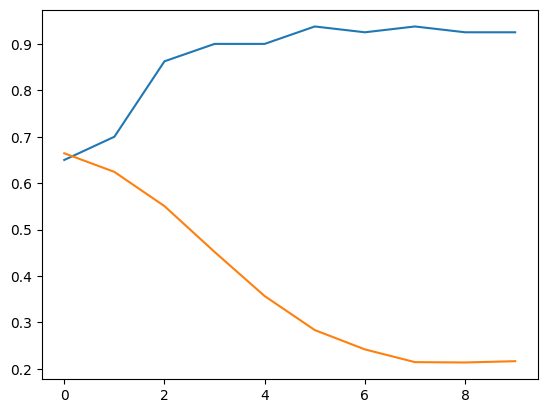

In [21]:
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['val_loss'])

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 32s 3ms/step


<Axes: >

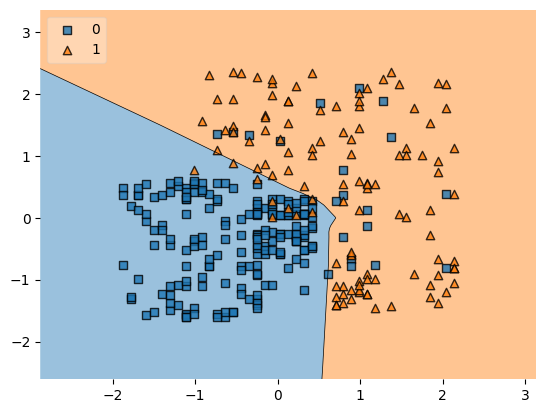

In [23]:
from mlxtend.plotting import plot_decision_regions 
plot_decision_regions(X_train,y_train.values,clf=model,legend=2)